In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">EDA

### Univariant Analysis: 

In [2]:
ds = pd.read_csv('concrete.csv');
ds.info()
ds.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


(1030, 9)

In [3]:
#Check for missing values
print(ds.isna().sum())
print(ds.isnull().sum())

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">
Looks the given data set is quite clean there is no missing values and all data types are numbers.

In [4]:
#Little more statistical understanding
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0e92ed"> UNIVARIANT ANALYSIS : 
    1) The data set looks balanced. With 1030 number of rows and 8 columns to learn from is ok. Except the age column rest of the data looks well spread with uniform distribution.
    2) slag and ash  data looks highly spreadout with min zero, 1st and 2nd Quirtile almost zero whild max value ranged from 350 to 540.
    3) age data looks in days and max 365 and min 1.

### Bi-variant Analysis: 

In [5]:
# Let's split the data before doing further analysis:
# train test split 70:30
#Remove the target varible
target = ds[['strength']]
data_set_buffer = ds.drop('strength',axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_set_buffer, target, test_size = 0.3, random_state = 123)

In [6]:
data_set_buffer.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7


In [7]:
train_data_Set = pd.concat([X_train, y_train], axis=1)
train_data_Set.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
666,310.0,0.0,0.0,192.0,0.0,970.0,850.0,28,27.92
237,250.2,166.8,0.0,203.5,0.0,977.6,694.1,3,9.73
725,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,28,44.09
802,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
568,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3,13.12


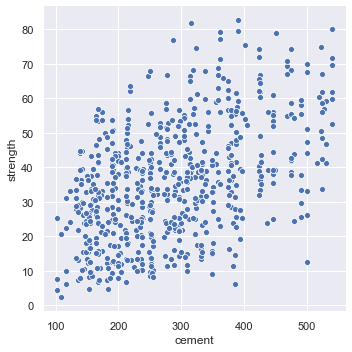

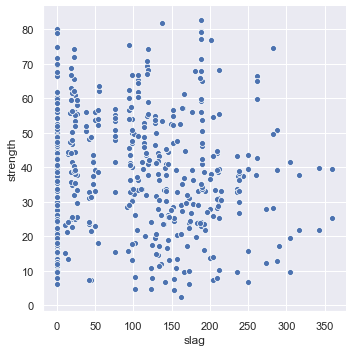

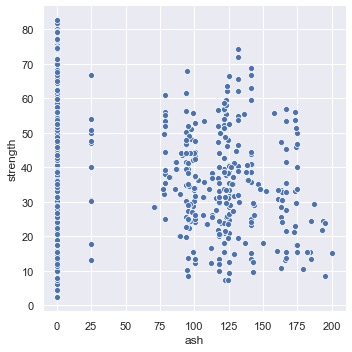

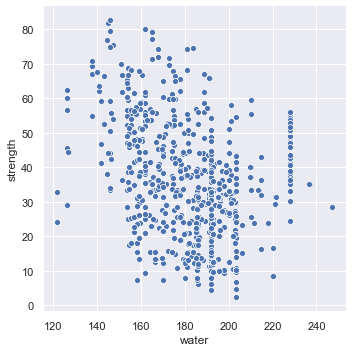

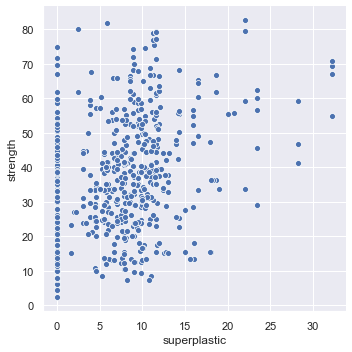

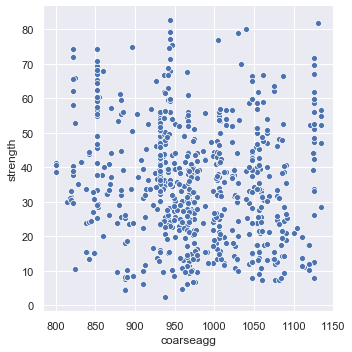

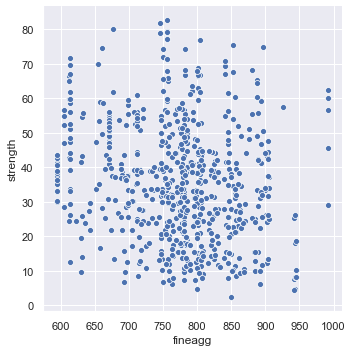

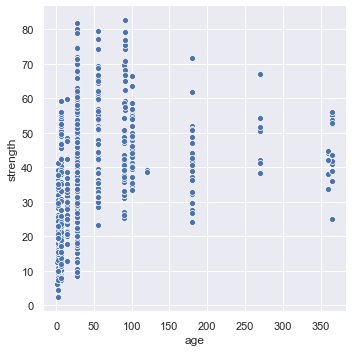

In [8]:
sns.relplot(x="cement", y="strength",  data=train_data_Set);
sns.relplot(x="slag", y="strength",  data=train_data_Set);
sns.relplot(x="ash", y="strength",  data=train_data_Set);
sns.relplot(x="water", y="strength",  data=train_data_Set);
sns.relplot(x="superplastic", y="strength",  data=train_data_Set);
sns.relplot(x="coarseagg", y="strength",  data=train_data_Set);
sns.relplot(x="fineagg", y="strength",  data=train_data_Set);
sns.relplot(x="age", y="strength",  data=train_data_Set);
#Looks like superplastic and cement have +ve correlation with the strength rest all are not straight forward to infer.

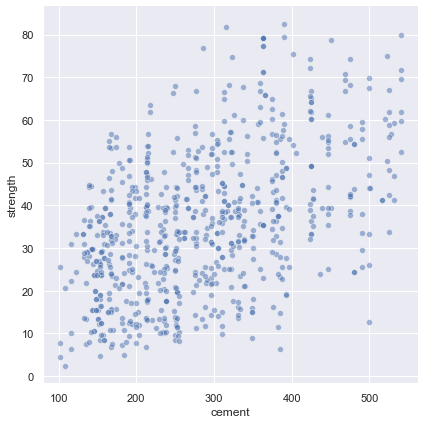

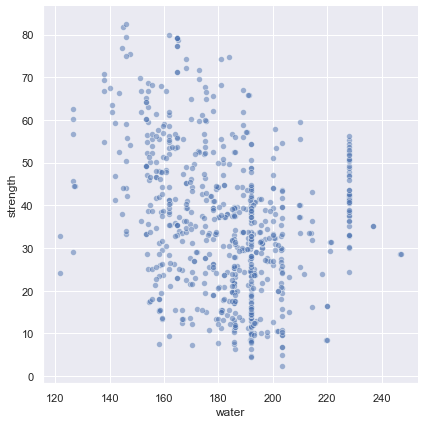

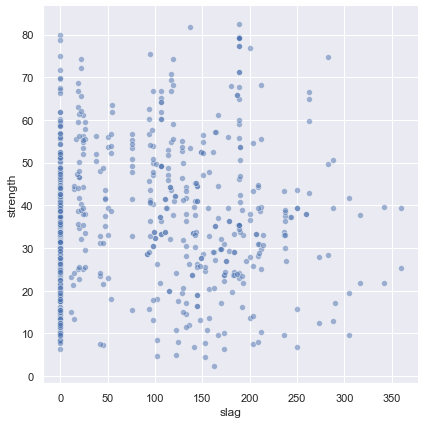

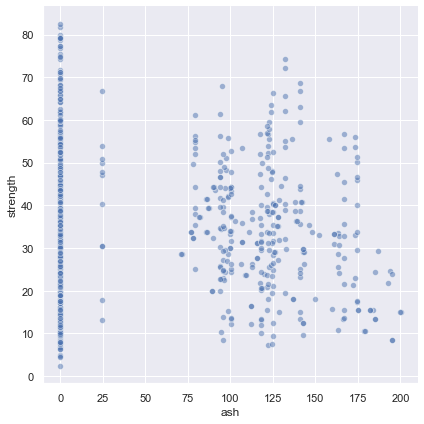

In [9]:
sns.relplot(x="cement", y="strength", alpha=.5, palette="muted",
            height=6, data=train_data_Set)
#distplot
sns.relplot(x="water", y="strength", alpha=.5, palette="muted",
            height=6, data=train_data_Set)

#histogram
sns.relplot(x="slag", y="strength", alpha=.5, palette="muted",
            height=6, data=train_data_Set)

sns.relplot(x="ash", y="strength", alpha=.5, palette="muted",
            height=6, data=train_data_Set)


It looks like the strength of cement depends on various proportions of ingredient. For e.g. The strength remains same for various amoung of ash level. Same behaviour can be observed for Slag ans Super plasitc. But one thing is clear that the strength has linearly related with the main ingredient that is 'Cement'. One important thing like any chemical composition, there need to be a perfect balance of various reagents required for best strength to achieve.This paves the way to do multivariant analysis. For e.g. we might observe that, if we have more water, we might need more fly ash to strengthen the concrete. Let's find out this. 

## Multi-Variant Analysis:

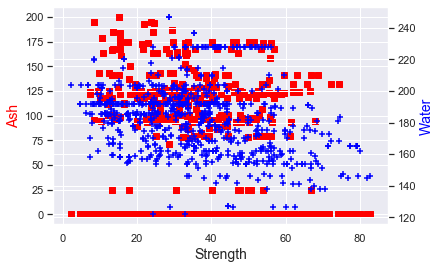

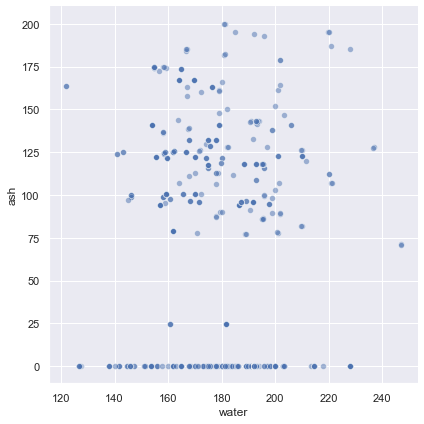

In [10]:
# Let's analyse the strength against water and fly-ash level

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.scatter(train_data_Set.strength,train_data_Set.ash,  color="red", marker=",")
# set x-axis label
ax.set_xlabel("Strength",fontsize=14)
# set y-axis label
ax.set_ylabel("Ash",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.scatter(train_data_Set.strength,train_data_Set.water,color="blue",marker="+")
ax2.set_ylabel("Water",color="blue",fontsize=14)
plt.show()
# save the plot as a file
sns.relplot(x="water", y="ash", alpha=.5, palette="muted",
            height=6, data=train_data_Set)


#Looks like yes. We need more water for more ash.

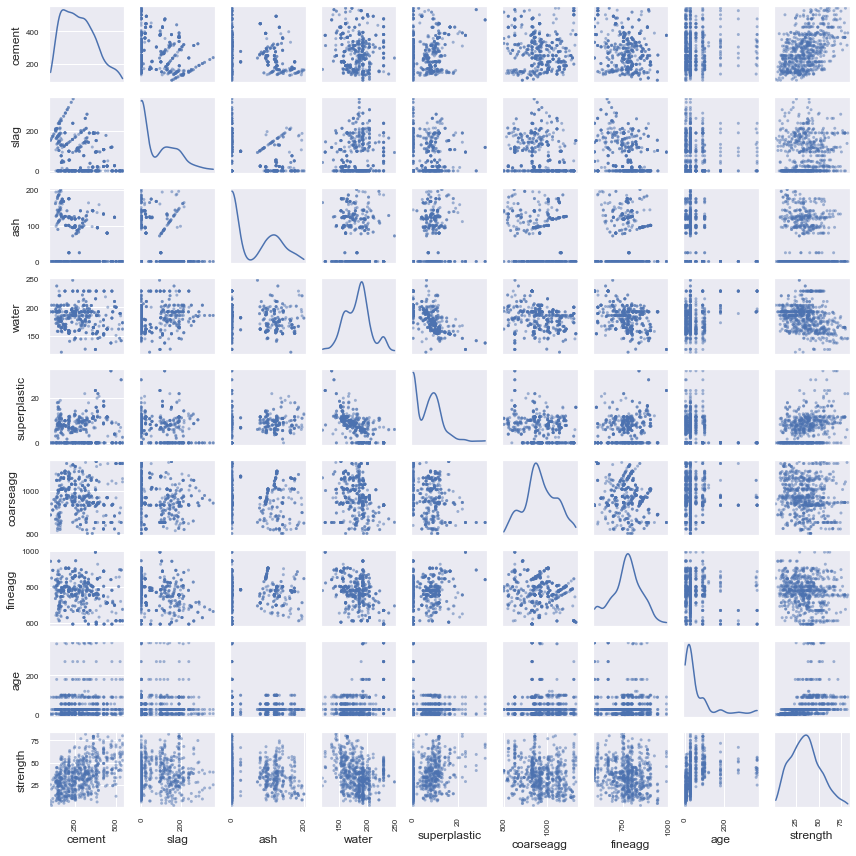

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_data_Set.loc[:],figsize=(12, 12),diagonal="kde")
plt.tight_layout()
plt.show()

### Observation :
There is no fixed ratio and proportion of input variables to achive the higher strength. 

We can also see that, The parameters like water vs superplastic follows an L shaped curve. That shows we need to maintain the ratios of multiple ingredients to achieve the same strength. 

We can  observe ash vs slag follows a linear relation. i.e. we have multi-colinearity relation among the input parameters which we must have to take care. 

Except cement and Strength other variables have multiple Gaussian distributions So definitely they have outliers also. 

Scaling : Looks fine as we can see the input parameters with  outliers and we have independent variables in same units.
 

In [12]:
train_data_Set.corr().T

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.300538,-0.371088,-0.090170,0.082929,-0.096696,-0.226879,0.061043,0.491941
slag,-0.300538,1.000000,-0.317631,0.115552,0.015072,-0.253631,-0.292120,-0.020707,0.112063
ash,-0.371088,-0.317631,1.000000,-0.238108,0.404854,-0.052147,0.078758,-0.173205,-0.107151
water,-0.090170,0.115552,-0.238108,1.000000,-0.666013,-0.186566,-0.459752,0.289628,-0.291624
superplastic,0.082929,0.015072,0.404854,-0.666013,1.000000,-0.247979,0.227523,-0.203486,0.350018
coarseagg,-0.096696,-0.253631,-0.052147,-0.186566,-0.247979,1.000000,-0.173716,-0.004992,-0.140430
fineagg,-0.226879,-0.292120,0.078758,-0.459752,0.227523,-0.173716,1.000000,-0.157074,-0.170191
age,0.061043,-0.020707,-0.173205,0.289628,-0.203486,-0.004992,-0.157074,1.000000,0.328048
strength,0.491941,0.112063,-0.107151,-0.291624,0.350018,-0.140430,-0.170191,0.328048,1.000000


### Observation : 
water has -ve correlation with superplastic and fineagg.
cement and strength has +ve correlation.

### Pick one strategy to address the presence outliers and missing values and perform necessary imputation 

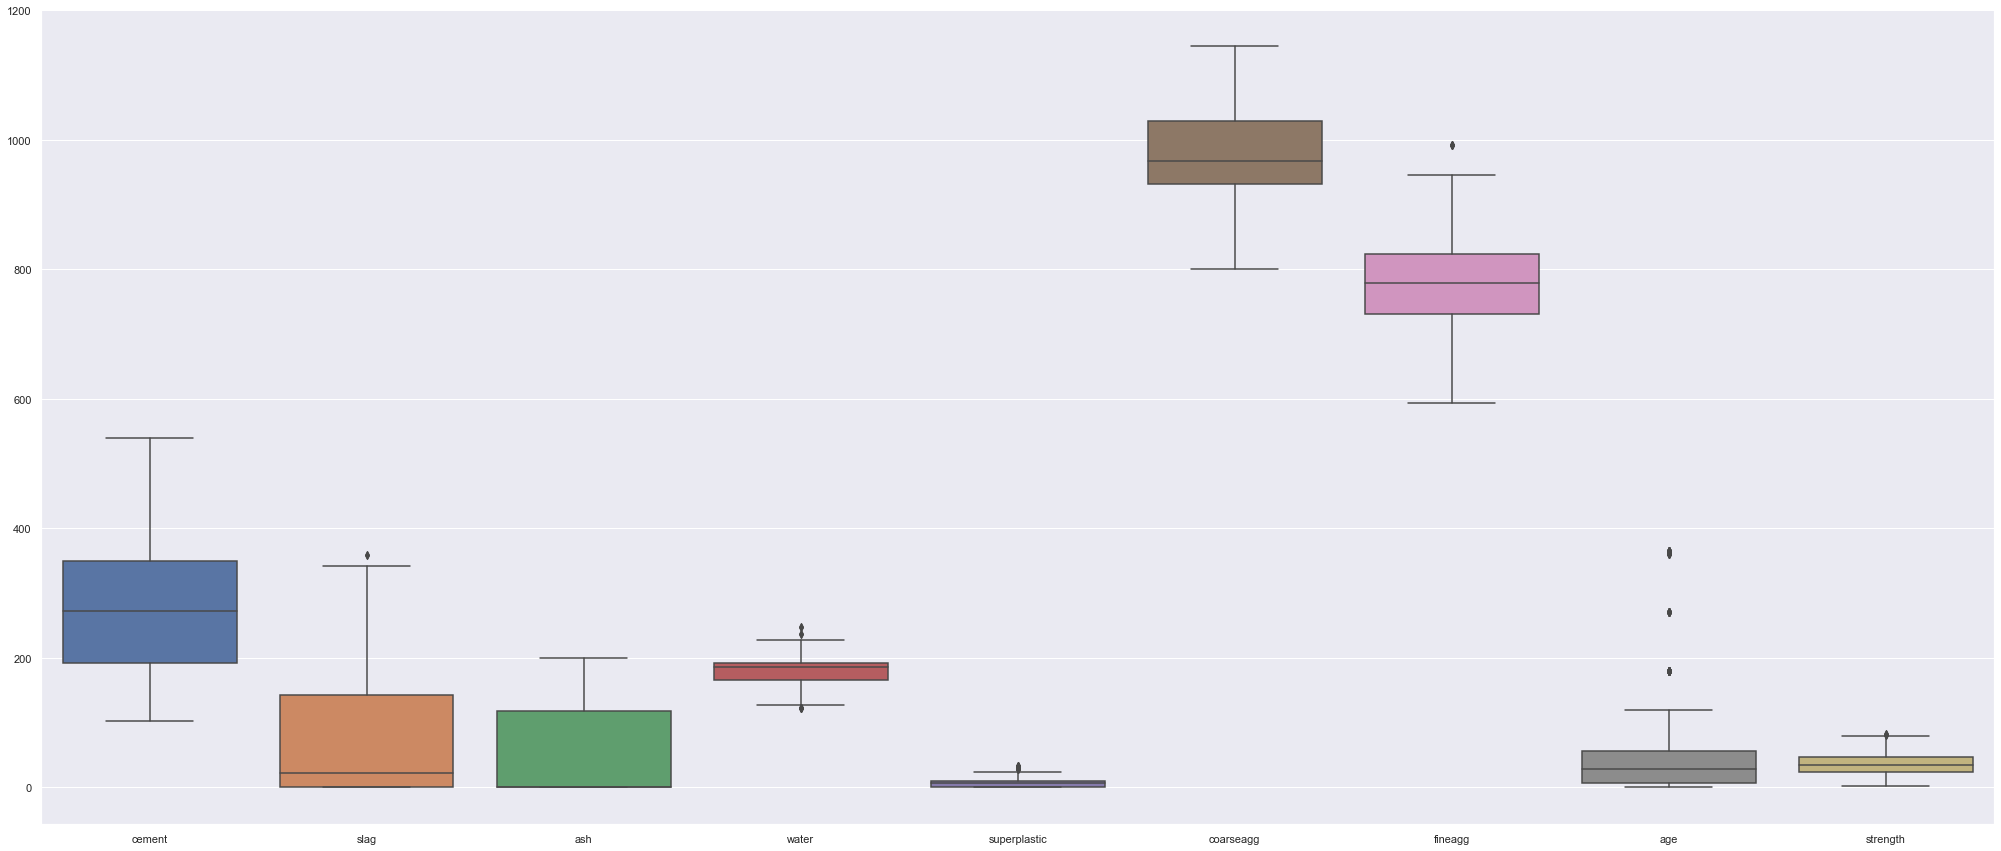

In [13]:
#Strength is the target column while rest are our input variable.
#Let's do box plot to find the outliers if there any
plt.figure(figsize=(35,15))
sns.boxplot(data=ds)

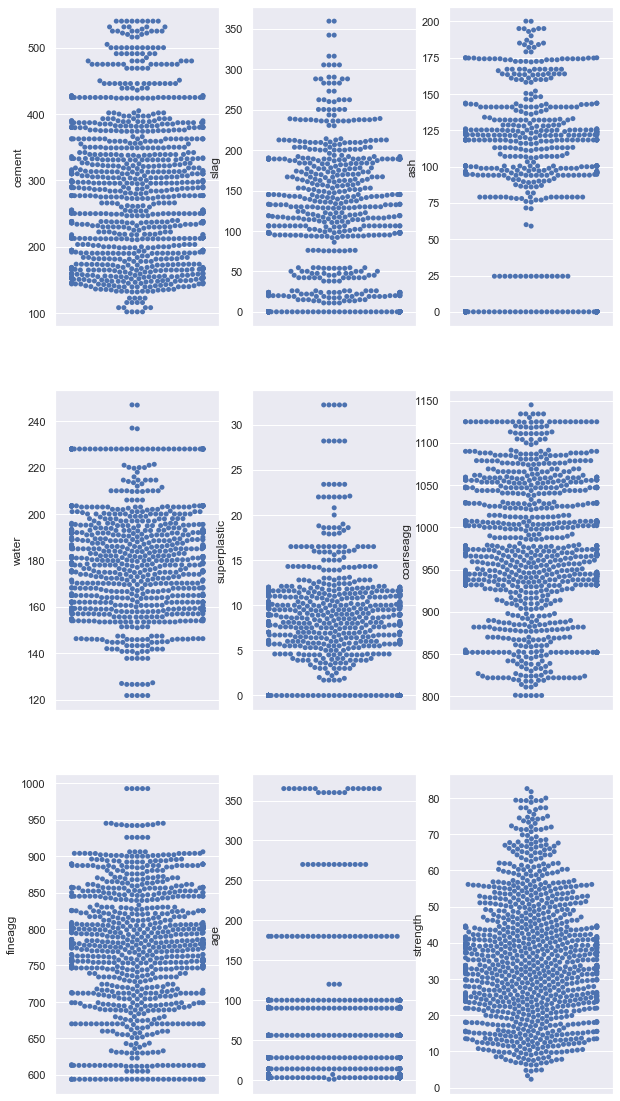

In [14]:
import itertools
plt.figure(figsize=(10,20))
j=0;
for i, c in zip(ds.columns , list(ds.columns.values) ):
    j=j+1
    plt.subplot(3,3,j)
    sns.swarmplot( y = ds[i]);
    plt.title= c
    plt.show

### Observation:
Looks like there are not much outliers but age,water, slag and superplastic surely have some outlier. If these belong to feature importance we have to take care of it.
There are data for slag and ash also looks quite right skewed as we have analysed earlier.

In [15]:
# Let's replace the outliers with median values
import numpy as np
outliers =  []
from scipy import stats
zscore = train_data_Set.apply(stats.zscore)
ds_columns = train_data_Set.columns.values
for key, value in zscore.iteritems():
    row=0
    medianV = np.median(train_data_Set[[key]])
    columnnum = train_data_Set.columns.get_loc(key)
    for v in value:
        if v>3 or v < -3 :
            outliers.append(v)
            train_data_Set.iloc[row,columnnum] = medianV
            print (train_data_Set.iloc[row,columnnum] )
        row = row + 1
     
print("outlier size ", len(outliers))

24.0
24.0
24.0
24.0
6.2
6.2
6.2
6.2
6.2
6.2
6.2
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
outlier size  36


### There are 36 values with zscore inbetween -3 and +3 so we got 36 outliers. 

###  Feature Engineering, Model Building and Model Tuning

In [16]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
print('The feature importances starting from hightest:')
for (i, j) in zip(X_train.columns , reversed(sorted(dtr_model.feature_importances_))): 
    print(i,j)

The feature importances starting from hightest:
cement 0.3831155026027949
slag 0.31888173326575825
ash 0.10282781644038919
water 0.10215260810961088
superplastic 0.030043226807163592
coarseagg 0.02990389138502381
fineagg 0.02300393491602931
age 0.010071286473229983


### Observation : cement,age ,water , ash , slag are important feature of imprtance

In [18]:
print(dtr_model.score(X_train, y_train))
print(dtr_model.score(X_test, y_test))

0.9962578058267287
0.8438116203033118


#### Looks like the Decision Tree Regression model is in over fitting state we have to tune our model.

In [19]:
# Regularizing the Decision tree classifier to avoid over fitting situation described above
reg_dtr_model = DecisionTreeRegressor( max_depth = 5,random_state=1,min_samples_leaf=6)
reg_dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [20]:
print(reg_dtr_model.score(X_train, y_train))
print(reg_dtr_model.score(X_test, y_test))

0.8136940442559788
0.7383844039045269


In [21]:
print('The feature importances:')
for (i, j) in zip(X_train.columns ,reversed(sorted(reg_dtr_model.feature_importances_))): 
    print(i,j)

The feature importances:
cement 0.41195416963117
slag 0.34211394583648386
ash 0.10839679348588277
water 0.10325750183629533
superplastic 0.02074018700040438
coarseagg 0.0060032174237904514
fineagg 0.004210646038216809
age 0.003323538747756483


Text(0.5, 1.0, 'Feature Importance Pie')

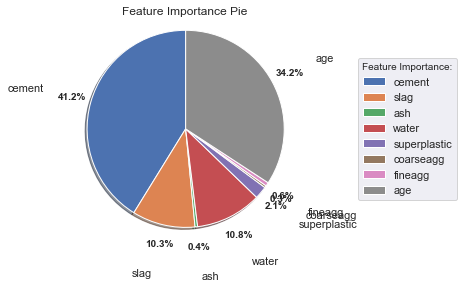

In [22]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = X_train.columns
sizes = reg_dtr_model.feature_importances_
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.01f%%',
        shadow=True, startangle=90,pctdistance=1.2, labeldistance=1.5 )
ax1.axis('equal') 
ax1.legend(wedges, labels,
          title="Feature Importance:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")

ax1.set_title("Feature Importance Pie")

### Observation : Cement,Age,Slag and Water Can  explain more than 96% of Strength. We can keep 4 variables and drop the rest. Just before doing let's find if there any strong correlation between other dependant variables.

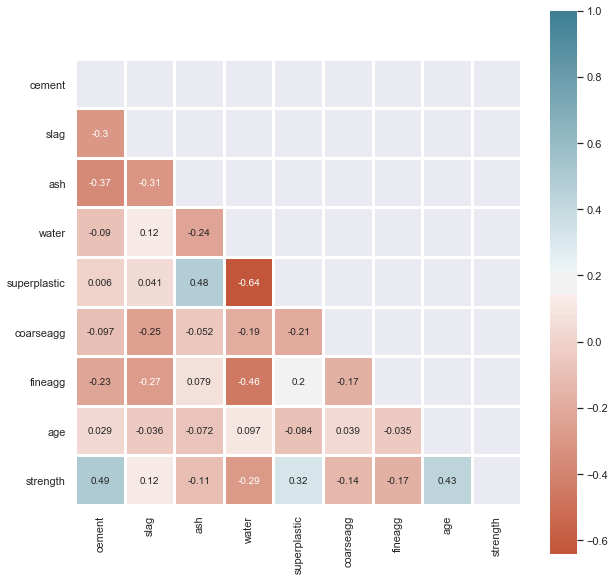

In [23]:
#Let's confirm the correlation with correlation matrix
#Find correlation
plt.figure(figsize=(10,10))
corr =train_data_Set.corr()
matrix = np.triu(corr)
ax=sns.heatmap(corr, annot=True, mask=matrix,cmap= sns.diverging_palette(20, 220, n=200), linewidths=2,linecolor='white',square=True)
plt.show()

Observation : Water has strong -ve relation with Superplastic and fineagg so just considering water and not taking Superplastic and fineagg will not be a good idea.
Similarly, ash has -ve co-relation with cement so we can't drop ash too.

### Observation : Our feature of imprtance would be : Cement,Age,Slag, Water, Superplastic,fineagg and ash

In [24]:
#Let's drop the coarseagg column and use important features only to analyse further.
data_set_buffer_feature_imprtance = ds.drop('coarseagg',axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_set_buffer_feature_imprtance, target, test_size = 0.3, random_state = 123)

### Do we need simple Linear regression or model with higer order polynomials? Let's try a simple Linear Regression and test with cross validataion to arrive any conclusion.

In [25]:
import statsmodels.api as sm
lr_1 = sm.OLS(y_train, X_train).fit()

In [26]:
y_pred = lr_1.predict(X_test)

In [27]:
from sklearn import metrics
metrics.explained_variance_score(y_test, y_pred)

1.0

Linear Regression is almost perfect! Let's find out with cross validation.

K fold cross validation without removing outlier and with 50 folds:

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LinearRegression()
results = cross_val_score(model, data_set_buffer, target, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print(color.RED)
print(color.BOLD)
print('Accuracy Score')
print(color.BLUE)
print('Average: ', results.mean())
print('Standard deviation ',results.std())

[0.17870437 0.4847429  0.3789107  0.04414806 0.71622864 0.74136227
 0.58109431 0.60722103 0.76781166 0.58540217 0.63602117 0.80139053
 0.72906607 0.59422765 0.64876072 0.14473889 0.33798267 0.57764746
 0.7016755  0.69616472 0.75742717 0.43497569 0.62875254 0.31280653
 0.3527877  0.66034513 0.59359106 0.722966   0.62229113 0.60443754
 0.61951559 0.7790544  0.50271662 0.62629374 0.37811978 0.69602295
 0.13162226 0.56778718 0.69471774 0.65658626 0.43339489 0.4184042
 0.73657696 0.32944263 0.62075502 0.61713429 0.43892396 0.26132179
 0.56497247 0.59935341]
Accuracy: 54.633% (18.267%)


Accuracy Score

Average:  0.5463279618407508
Standard deviation  0.18266777411402838


In [29]:
data_set_buffer_removed_outlier = data_set_buffer
zscore = data_set_buffer_removed_outlier.apply(stats.zscore)
ds_columns = data_set_buffer_removed_outlier.columns.values
for key, value in zscore.iteritems():
    row=0
    medianV = np.median(data_set_buffer[[key]])
    columnnum = data_set_buffer_removed_outlier.columns.get_loc(key)
    for v in value:
        if v>3 or v < -3 :
            data_set_buffer_removed_outlier.iloc[row,columnnum] = medianV
        row = row + 1

target_removed_outlier = target
zscore = target_removed_outlier.apply(stats.zscore)
ds_columns = target_removed_outlier.columns.values
for key, value in zscore.iteritems():
    row=0
    medianV = np.median(target[[key]])
    columnnum = target_removed_outlier.columns.get_loc(key)
    for v in value:
        if v>3 or v < -3 :
            target_removed_outlier.iloc[row,columnnum] = medianV
        row = row + 1


Let's apply paarameter tuning

In [30]:
num_folds = 15
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LinearRegression()
results = cross_val_score(model, data_set_buffer_removed_outlier, target_removed_outlier, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print(color.RED)
print(color.BOLD)
print('Accuracy Score after replacing outliers with median')
print(color.BLUE)
print('Average: ', results.mean())
print('Standard deviation ',results.std())

[0.59357578 0.70468698 0.5525503  0.7819457  0.61040533 0.65125106
 0.7592258  0.62040325 0.64739713 0.61746389 0.6341044  0.68931618
 0.68129944 0.61989005 0.54146493]
Accuracy: 64.700% (6.524%)


Accuracy Score after replacing outliers with median

Average:  0.6469986804097371
Standard deviation  0.06524355724662478


Observation : Our accuracy seems sensitive to outliers here as we can see with 15 K fold cross validation and scaling of the data we could able to achieve 70%.

# Create a regularized RIDGE model and note the coefficients

In [31]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[ 3.78983553e-07  3.00992977e-07  2.29116829e-07 -8.66311865e-07
   9.14635706e-07 -7.19415903e-09  4.12579918e-07  9.99996235e-01]]


# Create a regularized LASSO model and note the coefficients

In [32]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 9.14874086e-05  6.02138542e-05  4.42213351e-05 -0.00000000e+00
  0.00000000e+00  7.63983858e-06  4.56405818e-05  9.99282182e-01]


## Let us compare their scores

In [33]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9999997313874022
0.999999758995726


In [34]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9999999999943586
0.9999999999948481


# Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [35]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(data_set_buffer_removed_outlier)
X_scaled = pd.DataFrame(X_scaled, columns=data_set_buffer_removed_outlier.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y_train)
y_scaled = pd.DataFrame(y_scaled, columns=target.columns)  # ideally the training and test should be 

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [38]:
X_poly = poly.fit_transform(X_scaled)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, target, test_size=0.30, random_state=1)
X_train_poly.shape

(721, 37)

In [39]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train_poly, y_train_poly)
print(regression_model.coef_[0])

[ 1.07057693e-16  1.37321876e+01  1.03985423e+01  5.26083282e+00
 -7.13478754e-01  3.16388919e+00  2.11628200e+00  2.62180491e+00
  9.74575997e+00  1.07236871e+00  1.31858968e+00 -3.23607925e+00
 -1.04174960e+00  9.89263090e-01  5.24304029e-01  3.42796831e+00
  1.62062520e+00 -5.98507203e-01  1.40254083e+00  1.41125110e+00
  2.43207335e+00  5.19824800e+00 -2.05984616e+00 -1.19722616e+00
  5.62480138e-01  1.79933506e+00  4.42582887e+00  1.97028620e+00
 -1.45376417e+00 -4.08184539e-01  3.37539407e-01  1.46026087e+00
  1.63878322e+00  3.03117365e-01  1.87506924e+00  1.74736230e+00
  2.50008600e+00]


In [40]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train_poly,y_train_poly)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.         13.60517087 10.26121827  5.15210873 -0.8003715   3.16139363
   2.03157971  2.51253654  9.74355631  1.05372397  1.31232304 -3.21061871
  -1.05063215  0.98285848  0.51731541  3.33736808  1.60359606 -0.59507395
   1.37669296  1.38894966  2.41233416  5.11989568 -2.0297877  -1.22603216
   0.56354362  1.80013549  4.34516031  1.95320589 -1.44139985 -0.40249068
   0.27943326  1.43617693  1.61622278  0.31512988  1.87438643  1.70344401
   2.42524225]]


In [41]:
print(ridge.score(X_train_poly, y_train_poly))
print(ridge.score(X_test_poly, y_test_poly))

0.7654043503767092
0.7274469340458999


In [42]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_poly,y_train_poly)
print ("Lasso model:", (lasso.coef_))
print(lasso.score(X_train_poly, y_train_poly))
print(lasso.score(X_test_poly, y_test_poly))

Lasso model: [ 0.         13.27727038  9.8747328   4.84796815 -1.0496945   3.11557408
  1.77595599  2.21677882  9.7556594   0.96260438  1.20910908 -3.00293129
 -0.99275105  0.92135997  0.49511634  2.94021392  1.48641337 -0.45206171
  1.36370212  1.29833074  2.36022617  4.77877278 -1.81170721 -1.21603965
  0.52888811  1.79645007  4.02151584  1.853775   -1.37101258 -0.32004301
 -0.          1.39755912  1.56351895  0.32426472  1.85994222  1.47362481
  2.07950439]
0.7652114343552265
0.7279371135000473


### OBSERVATION : As simple linear regression is providing high accuracy we DON'T NEED polynomial of higher order. We shall be fine with simple linear models. As we observed with higher order, we loose our predectibility power.

Important Point : We have to employ only Regression technique and not classificiation ones because our output or the target 
is continious variable. Classification is ONLY be used for categorical varibles.
As we have a data set of where target variable is continuous neiture, Regression would do good rather than classification
Techniques such as Naive Bayes or KNN. Let's see

But our Kfold cross validation is only Accuracy 70%. That shows our model is succeptible to outliers and not generalizing well also.

### Linear Regression

In [43]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
from sklearn import metrics
metrics.explained_variance_score(y_test, y_pred)

1.0

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
randomf = RandomForestRegressor(n_estimators=10, max_depth = 3)
randomf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
randomf.score(X_test, y_test)

0.9886766749619773

### Gradient Boosting Regressor 

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
gbr.score(X_test, y_test)

0.9998473162958089

### KNeighborsRegressor 

In [48]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [49]:
knnr.score(X_test, y_test)

0.76013664028705

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Conclusion

### 1) With Linear Regression , Random Forest and Gradient Boosting Regressor we can achieve > 95% accuracy while KNeighbors Regressor has only 76% accuracy.
### 2) This Proves our earlier assumption that the given dataset fits well for regressor algos which works well for continuous data rather than classification techniques.
### 3) Our model accuracy improved significantly after replacing outliers with corresponding medians. i.e. the models we have used or infact most of the models are succeptible to  outliers present in feature importance input data.
### 4) Polynomials of higher orders are not necessarily improve model accuracy or generalization. It depends the dataset. As we observed this data set the strength of concrete surely depends on various proportions of inputs e.g. amount of cement, amount of fly ash, age so linear equations or first degree equations works well. e.g. =>3x+6y+6z = 8s